In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/SESA742087/Downloads/flight_train.csv (1)/flight_train.csv")

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
df.shape

(55000, 23)

In [5]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [6]:
#checking for duplicate values
df.duplicated().sum()

0

In [7]:
#checking for null values
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [8]:
#Splitting the numerical & categorical features
numerical_feaures=['AGE','FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

categorical_features=['GENDER','FFP_TIER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']

In [9]:
#checking the numerical features
df[numerical_feaures].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,54658.0,42.705789,9.803796,6.000000,35.000000,42.000000,48.000000,110.0
FLIGHT_COUNT,55000.0,13.213527,14.528764,2.000000,4.000000,8.000000,16.000000,213.0
BP_SUM,55000.0,12362.465164,17012.468908,0.000000,3497.000000,6903.000000,14481.000000,505308.0
SUM_YR_1,54738.0,6002.575145,8458.072660,0.000000,1400.000000,3426.500000,7406.000000,239560.0
SUM_YR_2,54937.0,6325.644993,9080.805391,0.000000,1300.000000,3484.000000,7760.000000,234188.0
SEG_KM_SUM,55000.0,19256.688255,21613.796416,1380.000000,6332.000000,11983.000000,23761.500000,580717.0
LAST_TO_END,55000.0,155.593436,169.987954,1.000000,25.000000,91.000000,226.000000,730.0
AVG_INTERVAL,55000.0,62.979631,64.506386,0.000000,25.166667,44.600000,77.500000,714.0
MAX_INTERVAL,55000.0,172.201745,117.382011,0.000000,90.000000,149.000000,230.000000,719.0
EXCHANGE_COUNT,55000.0,0.361727,1.201922,0.000000,0.000000,0.000000,0.000000,46.0


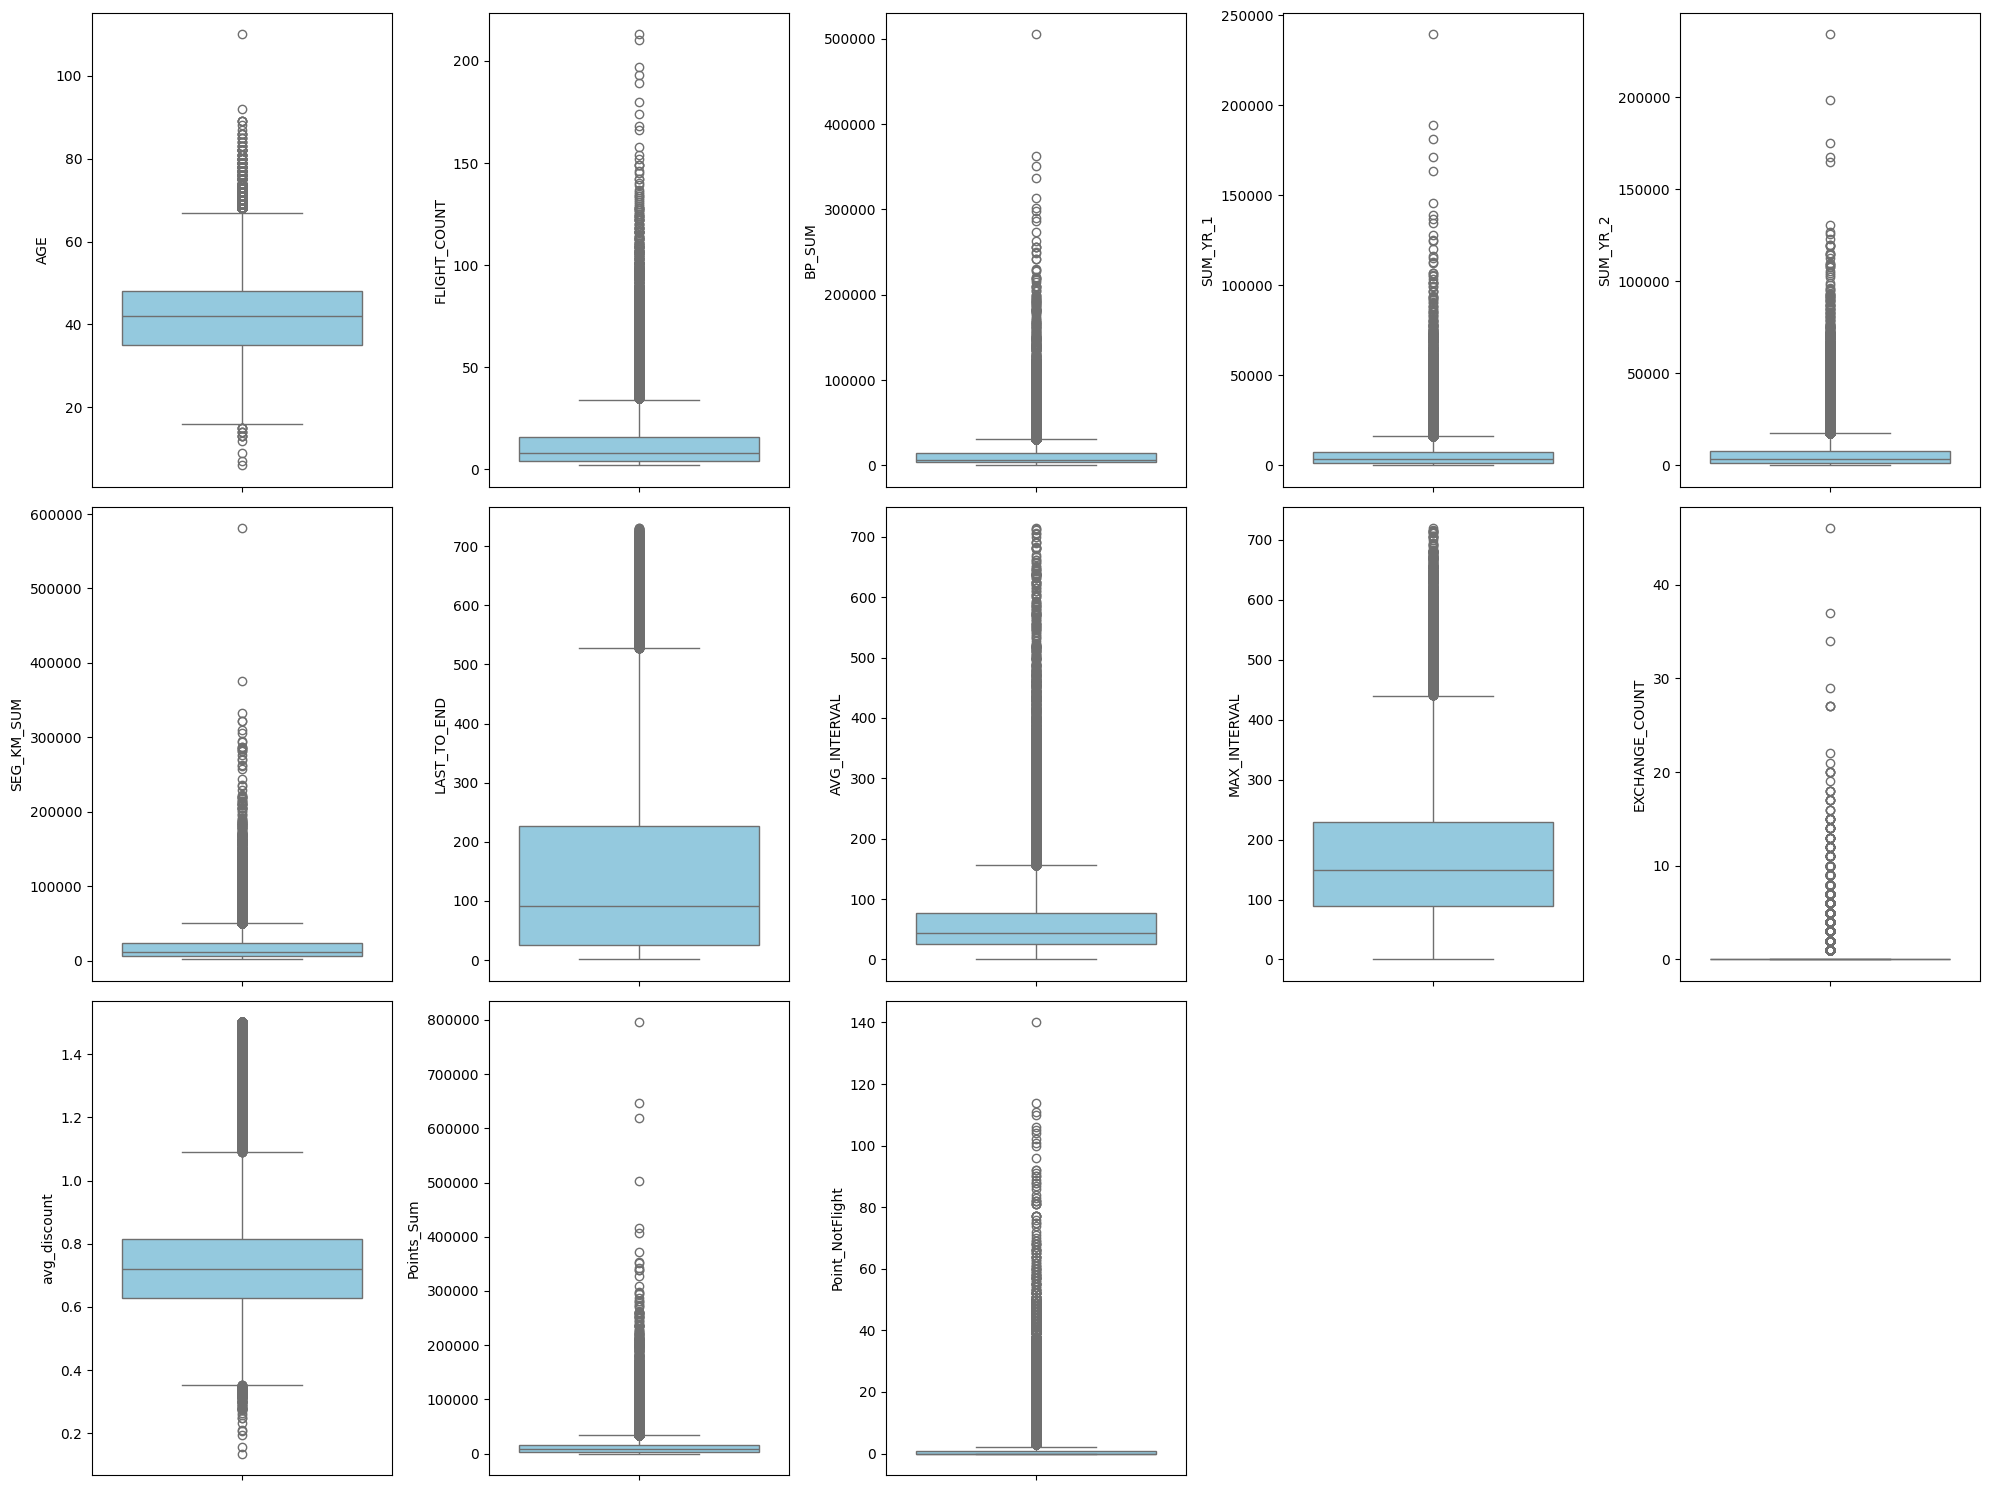

In [11]:
#Checking for outliers
plt.figure(figsize=(20,15))
features = numerical_feaures
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

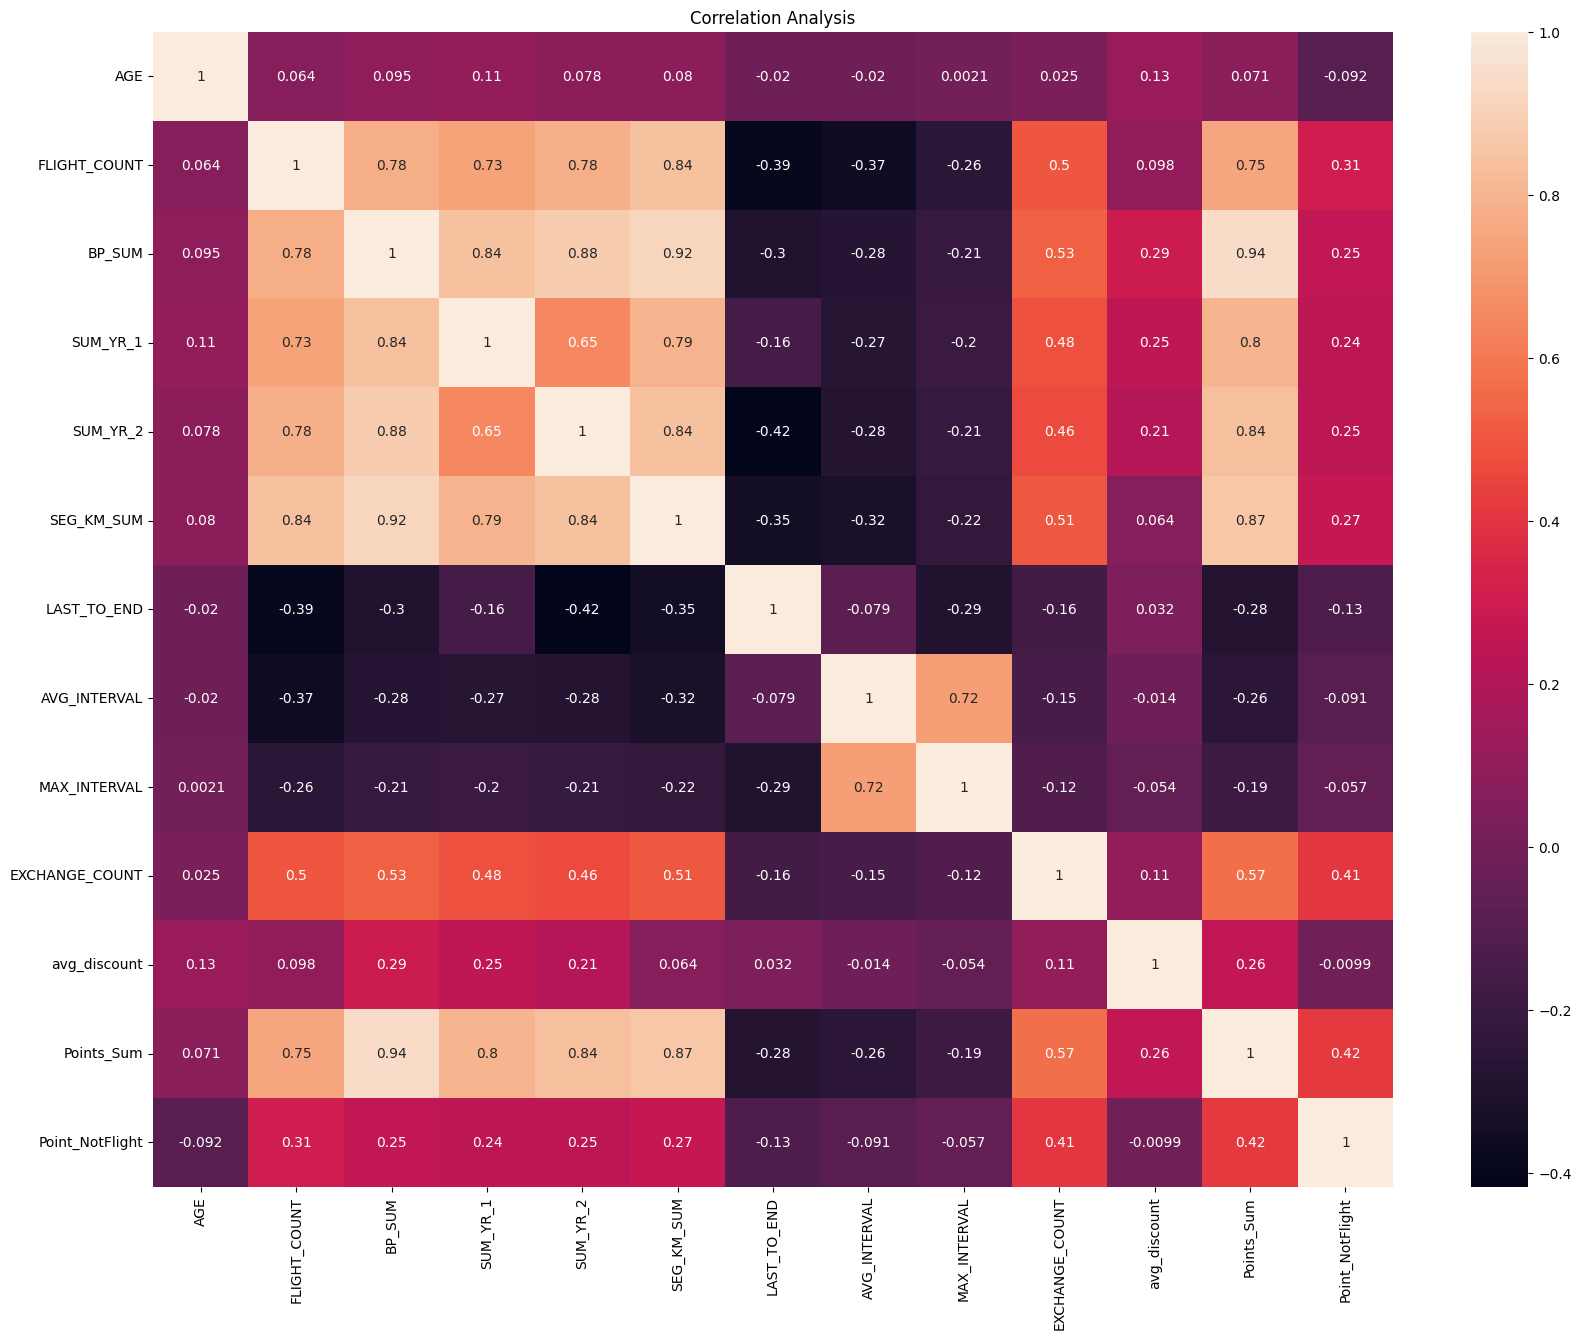

In [12]:
correlation_matrix = df[numerical_feaures].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Analysis")
plt.show()

In [13]:
#replace missing value with median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())


In [14]:
#Dataset with only member id
member_ids = df[['MEMBER_NO']]

In [15]:
#delete work_city, work_province, work_country, gender columns
df = df.drop(['MEMBER_NO','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [16]:
#Check the missing values again
df.isnull().values.any()

False

In [17]:
df['FFP_DATE']= pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE']= pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME']= pd.to_datetime(df['LOAD_TIME'])

In [18]:
def correct_invalid_dates(date):
    try:
        return pd.to_datetime(date)
    except ValueError:
        if '2/29' in date:
            return pd.to_datetime(date.replace('2/29', '2/28'))
        else:
            return pd.to_datetime(date, errors='coerce')

df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].apply(correct_invalid_dates)
df['LAST_FLIGHT_DATE']=pd.to_datetime(df['LAST_FLIGHT_DATE'],format='mixed')

In [ ]:
#when we consider 'AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL',
# 'EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight','BOOKING_FRQUENCY','DAYS_SINCE_FFP','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','FFP_TIER'
# these features for Clustering we are unable to form proper clusters hence  we will choose the LRFMC Model

In [19]:
df = df[df['SEG_KM_SUM'] <= 50_000]

In [20]:

dff = df[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
dff.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
960,2014-03-31,2011-01-30,5,68,49054,1.464809
971,2014-03-31,2007-11-18,9,28,48681,1.470490
999,2014-03-31,2007-08-24,148,28,48738,1.457490
1039,2014-03-31,2011-07-29,117,31,48504,1.439048
1047,2014-03-31,2009-12-01,22,51,49694,1.395562


In [23]:
dff['L'] = dff['LOAD_TIME'] - dff['FFP_DATE']
dff['L'] = (dff['L'].astype(str).str.split().str[0]).astype(int)

C:\Users\SESA742087\AppData\Local\Temp\ipykernel_18908\330371897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['L'] = dff['LOAD_TIME'] - dff['FFP_DATE']
C:\Users\SESA742087\AppData\Local\Temp\ipykernel_18908\330371897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['L'] = (dff['L'].astype(str).str.split().str[0]).astype(int)


In [24]:
dff = dff[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
dff.columns = ['L','R','F','M','C']
dff.head(2)

,L,R,F,M,C
960,1156,5,68,49054,1.464809
971,2325,9,28,48681,1.470490


In [25]:
sc = StandardScaler()
data_std = sc.fit_transform(dff.astype(float))

In [26]:
data_std = pd.DataFrame(data=data_std, columns=dff.columns)
data_std.head()

,L,R,F,M,C
0,-0.385395,-0.931447,6.479093,3.124719,4.153135
1,1.005897,-0.908222,1.973576,3.090890,4.185381
2,1.108250,-0.101132,1.973576,3.096060,4.111590
3,-0.599623,-0.281131,2.311490,3.074837,4.006905
4,0.120421,-0.832739,4.564248,3.182763,3.760059


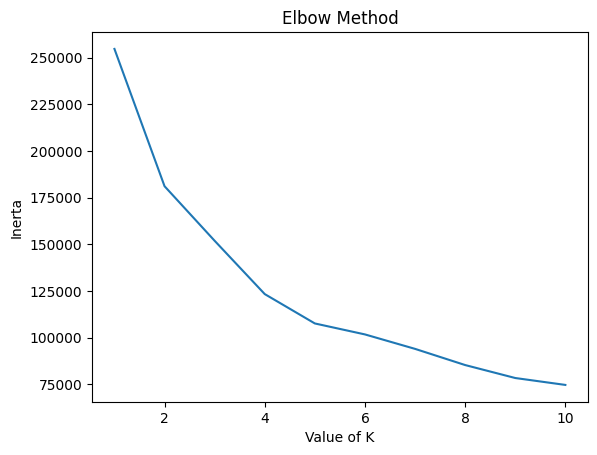

In [27]:
#K-means Clustering
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('Inerta')
plt.show()


In [28]:
#Trying Kmeans with 4 clusters
data_std_4 = data_std.copy()
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(data_std_4)
data_std_4['clusters'] = kmeans_4.labels_
data_std_4.head()

,L,R,F,M,C,clusters
0,-0.385395,-0.931447,6.479093,3.124719,4.153135,2
1,1.005897,-0.908222,1.973576,3.090890,4.185381,2
2,1.108250,-0.101132,1.973576,3.096060,4.111590,2
3,-0.599623,-0.281131,2.311490,3.074837,4.006905,2
4,0.120421,-0.832739,4.564248,3.182763,3.760059,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

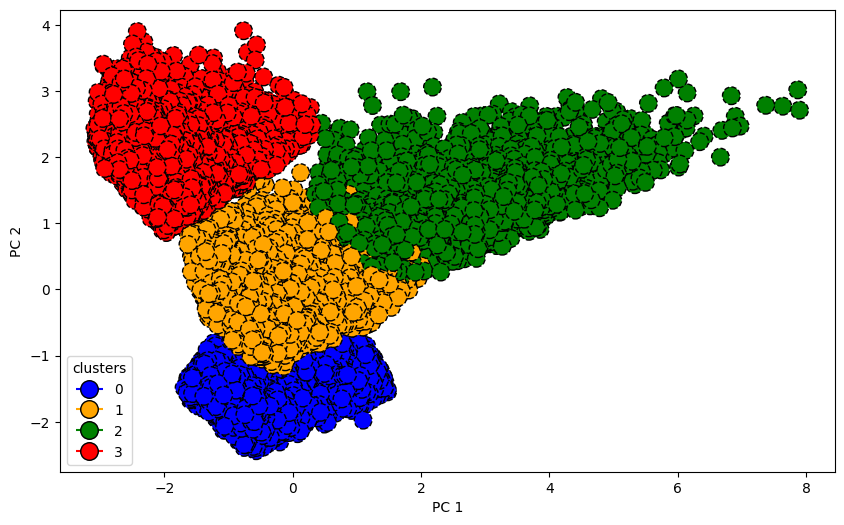

In [29]:
#Visulasing the 4 clusters
pca = PCA(n_components=2)

pca.fit(data_std_4)
pcs = pca.transform(data_std_4)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_4['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

In [30]:
#Trying Kmeans with 5 Clusters
data_std_5 = data_std.copy()
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(data_std_5)
data_std_5['clusters'] = kmeans_5.labels_
data_std_5.head()

,L,R,F,M,C,clusters
0,-0.385395,-0.931447,6.479093,3.124719,4.153135,2
1,1.005897,-0.908222,1.973576,3.090890,4.185381,4
2,1.108250,-0.101132,1.973576,3.096060,4.111590,4
3,-0.599623,-0.281131,2.311490,3.074837,4.006905,4
4,0.120421,-0.832739,4.564248,3.182763,3.760059,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

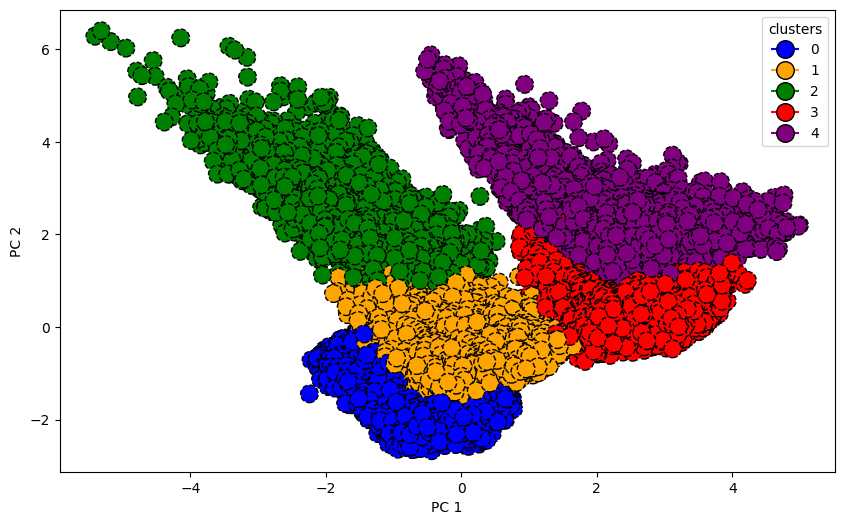

In [31]:
#Visualising the clusters
pca = PCA(n_components=2)

pca.fit(data_std_5)
pcs = pca.transform(data_std_5)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_5['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

In [32]:
#Trying with 6 Clusters
data_std_6 = data_std.copy()
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(data_std_6)
data_std_6['clusters'] = kmeans_6.labels_
data_std_6.head()

,L,R,F,M,C,clusters
0,-0.385395,-0.931447,6.479093,3.124719,4.153135,2
1,1.005897,-0.908222,1.973576,3.090890,4.185381,5
2,1.108250,-0.101132,1.973576,3.096060,4.111590,5
3,-0.599623,-0.281131,2.311490,3.074837,4.006905,5
4,0.120421,-0.832739,4.564248,3.182763,3.760059,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

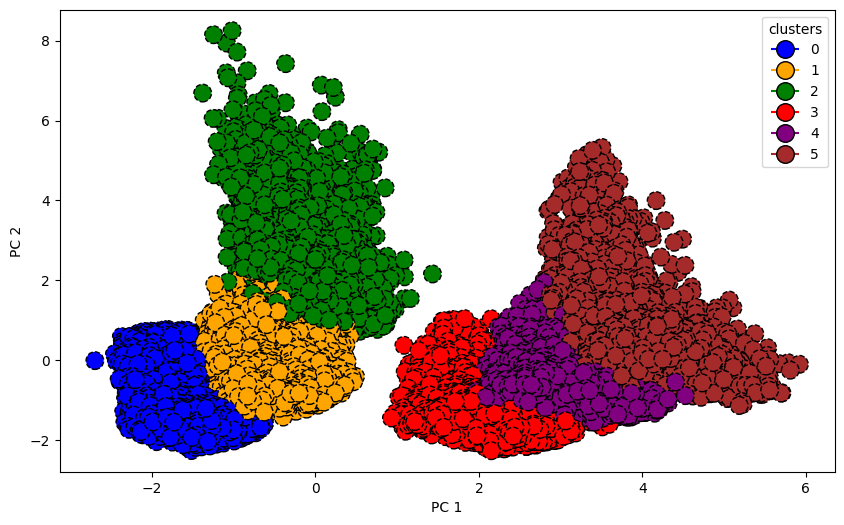

In [33]:
pca = PCA(n_components=2)

pca.fit(data_std_6)
pcs = pca.transform(data_std_6)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_6['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

In [34]:
# We can see that segmentation is better with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data_std)
data_std['clusters'] = kmeans.labels_
data_std.head()


,L,R,F,M,C,clusters
0,-0.385395,-0.931447,6.479093,3.124719,4.153135,2
1,1.005897,-0.908222,1.973576,3.090890,4.185381,5
2,1.108250,-0.101132,1.973576,3.096060,4.111590,5
3,-0.599623,-0.281131,2.311490,3.074837,4.006905,5
4,0.120421,-0.832739,4.564248,3.182763,3.760059,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

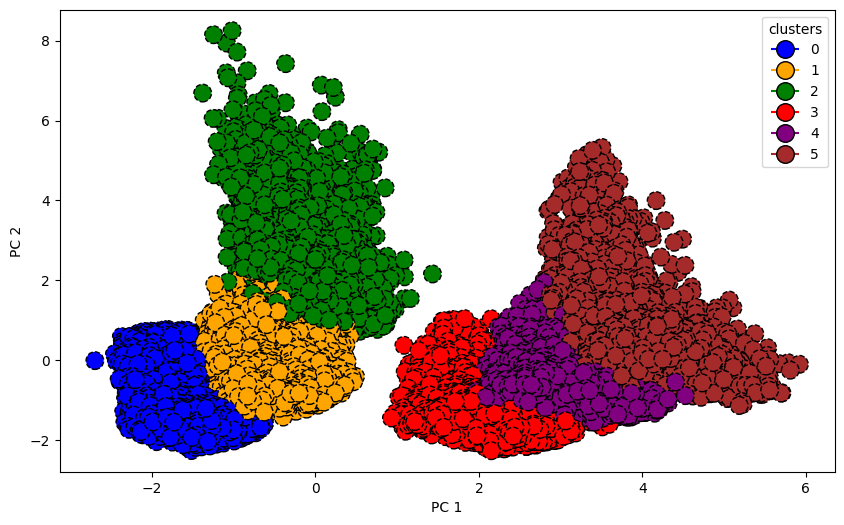

In [35]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

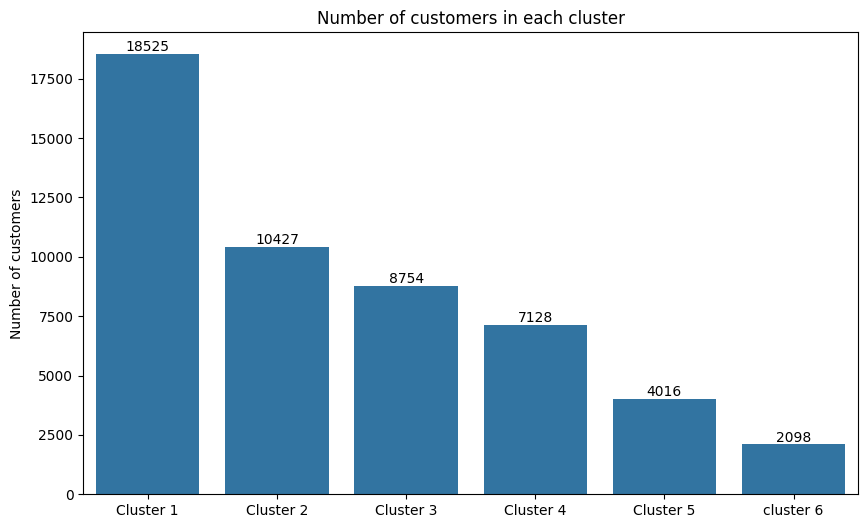

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data_std["clusters"])
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4,5], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","cluster 6"])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

In [37]:

from sklearn.cluster import DBSCAN
data_db=data_std.copy(deep=True)
data_db.drop(columns='clusters',inplace=True)
model=DBSCAN(min_samples=50)
model.fit(data_db)
data_db['cluster'] = model.labels_
data_db.head()

,L,R,F,M,C,cluster
0,-0.385395,-0.931447,6.479093,3.124719,4.153135,-1
1,1.005897,-0.908222,1.973576,3.090890,4.185381,-1
2,1.108250,-0.101132,1.973576,3.096060,4.111590,-1
3,-0.599623,-0.281131,2.311490,3.074837,4.006905,-1
4,0.120421,-0.832739,4.564248,3.182763,3.760059,-1


<Axes: xlabel='PC 1', ylabel='PC 2'>

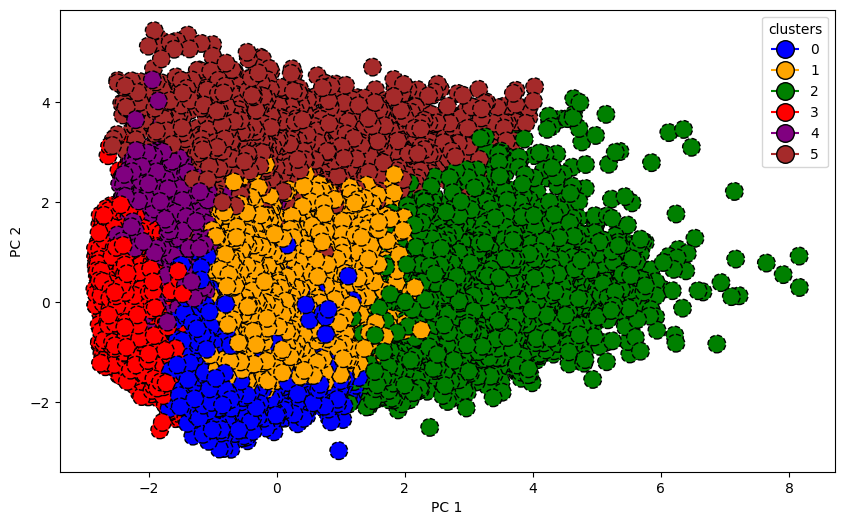

In [38]:
pca = PCA(n_components=2)

pca.fit(data_db)
pcs = pca.transform(data_db)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

In [39]:
merged_data=member_ids.join(data_std)
result=merged_data[['MEMBER_NO','clusters']]
result.head()


,MEMBER_NO,clusters
0,54993,2.0
1,28065,5.0
2,55106,5.0
3,21189,5.0
4,39546,2.0


In [43]:
result['clusters'].value_counts()

clusters
0.0    18525
1.0    10427
2.0     8754
3.0     7128
4.0     4016
5.0     2098
Name: count, dtype: int64

In [45]:
result.to_csv("C:/Users/SESA742087/Documents/STREAMLIT/env/AirlineCustomer/Clusters.csv")